In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout,BatchNormalization
import PIL
import pathlib
import os
from keras.models import Sequential

In [4]:
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=data_url,untar=True,cache_dir=".")

In [5]:
data_dir = os.path.join(os.path.dirname(data_dir), 'flower_photos')

In [6]:
data_dir=pathlib.Path(data_dir)

In [7]:
a=list(data_dir.glob('*/*.jpg'))[0]

In [8]:
import matplotlib.pyplot as plt

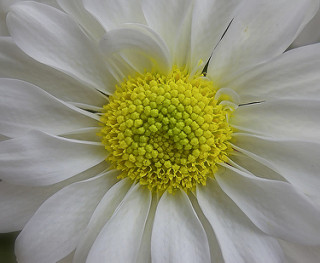

In [9]:
PIL.Image.open(str(a))

In [10]:
rose=list(data_dir.glob('roses/*'))[0]

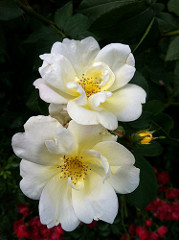

In [11]:
PIL.Image.open(str(rose))

In [12]:
flower_path={
    "rose":list(data_dir.glob('roses/*')),
    "sunflower":list(data_dir.glob('sunflowers/*')),
    "tulip":list(data_dir.glob('tulips/*')),
    "daisy":list(data_dir.glob('daisy/*')),
    "dandelion":list(data_dir.glob('dandelions/*')),
}

In [13]:
flower_label={
    "rose":0,
    "sunflower":1,
    "daisy":2,
    "tulip":3,
    "dandelion":4,
}

In [14]:
import cv2

In [15]:
x=[]
y=[]
for label,path in flower_path.items():
    for image in path:
        img=cv2.imread(str(image))
        resize=cv2.resize(img,(180,180))
        x.append(resize)
        y.append(flower_label[label])

In [16]:
import numpy as np

In [17]:
x=np.array(x)
y=np.array(y)

In [18]:
x[0].shape

(180, 180, 3)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
    MaxPool2D((2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(units=32,activation='relu'),
    Dense(units=5,activation='softmax')
])

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       3,786,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,806,341 (14.52 MB)

 Trainable params: 3,806,341 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [24]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 664ms/step - accuracy: 0.2737 - loss: 278.5220 - val_accuracy: 0.4144 - val_loss: 1.3862
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 618ms/step - accuracy: 0.5913 - loss: 1.2020 - val_accuracy: 0.3716 - val_loss: 1.5313
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 589ms/step - accuracy: 0.7231 - loss: 0.8391 - val_accuracy: 0.4775 - val_loss: 1.8077
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.8597 - loss: 0.4395 - val_accuracy: 0.4459 - val_loss: 2.5197
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 554ms/step - accuracy: 0.9224 - loss: 0.2650 - val_accuracy: 0.3986 - val_loss: 2.8332
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 612ms/step - accuracy: 0.9438 - loss: 0.2300 - val_accuracy: 0.4527 - val_loss: 3.4121
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 582ms/step - accuracy: 0.9588 - loss: 0.1431 - val_accuracy: 0.3806 - val_loss: 3.6974
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 559ms/step - accuracy: 0.9649 - loss: 0.1167 - val_ac

In [25]:
model.evaluate(xtest,ytest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.4119 - loss: 4.9957


[5.0775346755981445, 0.42522522807121277]

In [26]:
pred=model.predict(xtest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


In [27]:
np.argmax(pred[0])

3

In [28]:
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomContrast, RandomRotation,RandomZoom

In [29]:
data_augmentation=Sequential([
    RandomFlip("horizontal",input_shape=(180,180,3)),
    RandomContrast(0.3),
    RandomRotation(0.9),
    RandomZoom(0.2)
])

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model=Sequential([
    data_augmentation,
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(units=32,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=5,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [34]:
model.fit(xtrain,ytrain,epochs=10,validation_split=0.2)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.3747 - loss: 4.4740 - val_accuracy: 0.2838 - val_loss: 1.6222
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.4394 - loss: 1.6101 - val_accuracy: 0.4414 - val_loss: 1.5015
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4794 - loss: 1.2679 - val_accuracy: 0.4842 - val_loss: 1.1612
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5646 - loss: 1.1386 - val_accuracy: 0.4167 - val_loss: 1.4685
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5113 - loss: 1.1435 - val_accuracy: 0.4865 - val_loss: 1.1495
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5760 - loss: 0.9883 - val_accuracy: 0.5293 - val_loss: 1.2631
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5868 - loss: 0.9909 - val_accuracy: 0.5023 - val_loss: 1.6495
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5650 - loss: 1.0505 - val_accuracy: 0.5360 - val_loss:

In [35]:
model.evaluate(xtest,ytest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.5653 - loss: 1.0940


[1.1303019523620605, 0.5675675868988037]

In [36]:
pred=model.predict(xtest)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step


In [37]:
np.argmax(pred[0])

1

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

# Create ImageDataGenerator for training and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\LENOVO\OneDrive\Desktop\Untitled Folder 1\datasets\flower_photos',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    r'C:\Users\LENOVO\OneDrive\Desktop\Untitled Folder 1\datasets\flower_photos',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
Epoch 1/10


C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 69s 700ms/step - accuracy: 0.2964 - loss: 1.6752 - val_accuracy: 0.4651 - val_loss: 1.3849
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 634ms/step - accuracy: 0.5187 - loss: 1.1695 - val_accuracy: 0.5841 - val_loss: 1.0932
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 61s 636ms/step - accuracy: 0.6085 - loss: 0.9906 - val_accuracy: 0.6101 - val_loss: 0.9849
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 66s 692ms/step - accuracy: 0.6272 - loss: 0.9408 - val_accuracy: 0.6197 - val_loss: 0.9672
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 68s 716ms/step - accuracy: 0.6645 - loss: 0.8581 - val_accuracy: 0.6717 - val_loss: 0.9195
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 631ms/step - accuracy: 0.7104 - loss: 0.7705 - val_accuracy: 0.6389 - val_loss: 0.9301
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 632ms/step - accuracy: 0.6929 - loss: 0.8065 - val_accuracy: 0.6457 - val_loss: 0.9128
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 622ms/step - accuracy: 0.6876 - loss: 0.7839 - val_accuracy: 0.682